In [77]:
import urllib
import pyodbc
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
from matplotlib.dates import DateFormatter
import pandas as pd
from IPython.display import display, HTML

%matplotlib inline

In [72]:
data_d0 = '01-01-2015'
data_d1 = '08-13-2019'


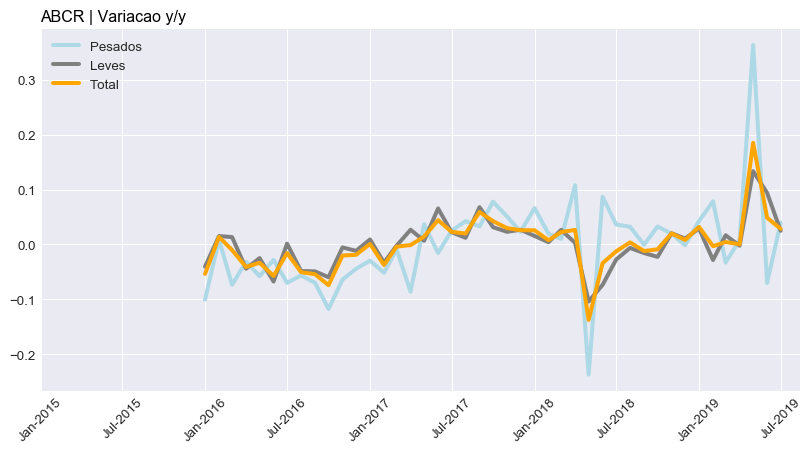

In [74]:
qry_str = 'SELECT tbl_ABCR.DataRef, tbl_ABCR.br_leves, tbl_ABCR.br_pesados, tbl_ABCR.br_total FROM tbl_ABCR WHERE (((tbl_ABCR.DataRef) Between #%s# And #%s#))' %(data_d0, data_d1)
conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=P:\Gestao\Python\comite\DB\gestao_db.accdb;')
sql_query = pd.read_sql_query(qry_str, conn)
conn.commit() 

df = sql_query
df['var_br_leves'] = (df['br_leves']/df['br_leves'].shift(12))-1
df['var_br_pesados'] = (df['br_pesados']/df['br_pesados'].shift(12))-1
df['var_br_total'] = (df['br_total']/df['br_total'].shift(12))-1

df['DataRef'] = [np.datetime64(i) for i in df['DataRef']]
df['DataRef'] = pd.to_datetime(df['DataRef'])
dataref = df['DataRef']

dataref = pd.to_datetime(dataref)
dataref = zip(dataref)

plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize = (980/my_dpi, 480/my_dpi), dpi = my_dpi)

pesados = plt.plot(df['DataRef'], df['var_br_pesados'], marker = '', color = 'lightblue', linewidth = 3, alpha = 1.0, label = 'Pesados')
leves = plt.plot(df['DataRef'], df['var_br_leves'], marker = '', color = 'grey', linewidth = 3, alpha = 1.0, label = 'Leves')
total = plt.plot(df['DataRef'], df['var_br_total'], marker = '', color = 'orange', linewidth = 3, alpha = 1.0, label = 'Total')

plt.xlim(data_d0, data_d1)
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')
formatter = DateFormatter('%b-%Y')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.title("ABCR | Variacao y/y", loc = 'left', fontsize = 12, color = 'black')
Columns = ('Pesados', 'Leves', 'Total')
rows = [x for x in df['DataRef'][-4:]]
rows_str = pd.to_datetime(rows)
rows_str = rows_str.strftime('%b-%Y')

tbl_summary = pd.DataFrame(df[-4:])
tbl_summary = tbl_summary[['DataRef','var_br_total','var_br_leves','var_br_pesados']]
tbl_summary = tbl_summary.sort_values(by='DataRef', ascending = False)

def color_negative_red(value):
    if value <0:
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

tbl_summary = tbl_summary.reset_index(drop = True)
tbl_summary['DataRef'] = pd.to_datetime(tbl_summary['DataRef']).dt.strftime('%b-%Y')
tbl = tbl_summary.style.applymap(color_negative_red, subset = ['var_br_total', 'var_br_leves', 'var_br_pesados']) \
.format({'var_br_total':'{:.2%}'}) \
.format({'var_br_leves':'{:.2%}'}) \
.format({'var_br_pesados':'{:.2%}'}) \
.hide_index()
